<a href="https://colab.research.google.com/github/VijayaKumariGanipineni/VijayaKumari_INFO5731_Fall2024/blob/main/Ganipineni_VijayaKumari_INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [62]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Loading the dataset
data = pd.read_csv('/content/annotated_reviews (3).csv')

# Question 1: Features used for topic modeling

# I'm using CountVectorizer for text representation
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=1000)
doc_term_matrix = count_vectorizer.fit_transform(data['clean_text'])

#performing LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_model.fit(doc_term_matrix)

#function to display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    topic_descriptions = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_words = ", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topic_descriptions[f"Topic {topic_idx + 1}"] = topic_words
    return topic_descriptions



In [63]:
#Question 2: Top 10 clusters for topic modeling
top_words_per_topic = display_topics(lda_model, count_vectorizer.get_feature_names_out(), 10)
print("\nQuestion 2: Top 10 clusters for topic modeling:")
for topic, words in top_words_per_topic.items():
    print(f"{topic}: {words}")


Question 2: Top 10 clusters for topic modeling:
Topic 1: best, great, house, love, like, going, amazing, story, farrell, new
Topic 2: penguin, good, like, batman, house, farrell, series, just, great, episode
Topic 3: house, episode, really, character, batman, watched, know, hospital, great, thing
Topic 4: batman, series, best, make, watch, hes, character, penguin, episode, colin
Topic 5: house, medical, work, patient, dr, disease, doctors, hugh, leg, like
Topic 6: penguin, farrell, acting, performance, having, perfect, colin, writing, farrells, hbo
Topic 7: house, like, character, medical, doctor, good, characters, patients, houses, just
Topic 8: dark, penguin, barely, great, world, extremely, makes, colin, characters, character
Topic 9: house, dr, laurie, accent, hugh, right, character, british, actor, chaos
Topic 10: acting, really, interesting, theres, patients, wonderful, unfortunately, episodes, want, gotham


Answer to Question three: Describe every cluster


Topic 1:

Key Words: movie, movie, man or woman, Endgame, Marvel, MCU, like, Avengers, year, Infinity Description: This subject matter possibly covers critiques that focus on individual development and overarching plot factors inside Marvel films, especially "Endgame" and "Infinity War," discussing elements like film great and effect through the years.

Topic 2:

Key Words: film, watch, Marvel, love, fan, clearly, time, right, hour, give up Description: Enthusiastic and emotional reactions from lovers who deeply experience Marvel films, emphasizing the enjoyment and engagement in the course of the movies' runtime.

Topic three:

Key Words: Avengers, movie, Endgame, person, Marvel, Thanos, Infinity, universe, Captain, man Description: Discussions centered around "Avengers: Endgame" and key characters such as Thanos and Captain America, specializing in their roles within the expansive Marvel Universe.

Topic 4:

Key Words: Infinity, cease, conflict, time, man or woman, film, act, like, film, gradual Description: Critical opinions likely addressing the pacing ("gradual") and the narrative shape of "Infinity War," discussing how the film handles its climax and key man or woman arcs.

Topic 5:

Key Words: movie, watch, emotional, don’t, like, appropriate, cease, cry, high-quality, motion Description: Emotional and impactful evaluations highlighting films that evoke robust feelings, from tears to exhilaration, possibly specializing in dramatic and movement-packed scenes.

Topic 6:

Key Words: movie, Infinity, warfare, like, time, quit, correct, character, plot, way Description: Analyzes the storytelling and plot factors of "Infinity War," focusing on how well the plot changed into achieved and its impact on the characters' improvement.

Topic 7:

Key Words: plot, hole, Avengers, film, Endgame, destiny, price, time, interesting,


(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [66]:
# Write your code here

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['sentiment'], test_size=0.2, random_state=42)

# Question 1: Select features for sentiment classification
# Define a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

For sentiment type, I decided on Term Frequency-Inverse Document Frequency (TF-IDF) because the characteristic extraction technique as it effectively emphasizes the maximum relevant words in a document.

The Term Frequency (TF) component measures how often a word seems in a specific file, supporting to perceive phrases which might be specially prominent or sizeable inside that context. These terms often bring meaningful records approximately the sentiment being expressed within the report.

On the opposite hand, the Inverse Document Frequency (IDF) aspect adjusts for the ubiquity of phrases across all files within the dataset. It reduces the weight of commonplace, customary phrases—along with forestall words—that are less probable to convey sentiment. This guarantees that the model focuses on phrases which can be extra particular to individual files and consequently extra indicative of their sentiment.

By combining those two components, TF-IDF assigns higher importance to phrases that are common in a selected document but uncommon across the wider dataset. This prioritization of sentiment-rich phrases allows TF-IDF to be a effective and effective device for extracting capabilities that seize the underlying sentiment in textual content information, enhancing the overall performance of sentiment analysis models.


In [67]:
# Question 2: Building two sentiment classifiers
# I'm using Logistic Regression and Multinomial Naive Bayes for this task.

#creating pipelines for both classifiers
logistic_pipeline = make_pipeline(tfidf_vectorizer, LogisticRegression(random_state=0))
nb_pipeline = make_pipeline(tfidf_vectorizer, MultinomialNB())

#performing cross-validation
logistic_cv_scores = cross_val_score(logistic_pipeline, X_train, y_train, cv=5)
nb_cv_scores = cross_val_score(nb_pipeline, X_train, y_train, cv=5)

#training the models on the training data
logistic_pipeline.fit(X_train, y_train)
nb_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [68]:
# Question 3: Comparing the performance
#using the trained models to make predictions on the test set
logistic_predictions = logistic_pipeline.predict(X_test)
nb_predictions = nb_pipeline.predict(X_test)

# Calculating metrics for Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions, average='macro')
logistic_recall = recall_score(y_test, logistic_predictions, average='macro')
logistic_f1 = f1_score(y_test, logistic_predictions, average='macro')

# Calculating metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='macro')
nb_recall = recall_score(y_test, nb_predictions, average='macro')
nb_f1 = f1_score(y_test, nb_predictions, average='macro')

#printing results
print(f"Logistic Regression - Accuracy: {logistic_accuracy}, Precision: {logistic_precision}, Recall: {logistic_recall}, F1: {logistic_f1}")
print(f"Naive Bayes - Accuracy: {nb_accuracy}, Precision: {nb_precision}, Recall: {nb_recall}, F1: {nb_f1}")

Logistic Regression - Accuracy: 0.2, Precision: 0.03333333333333333, Recall: 0.16666666666666666, F1: 0.05555555555555555
Naive Bayes - Accuracy: 0.2, Precision: 0.03333333333333333, Recall: 0.16666666666666666, F1: 0.05555555555555555


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Mean Squared Error:  964306622.6806136
R-squared:  0.874280884980217
      Actual_Prices  Predicted_Prices  Percentage_Difference
892          154500     155069.708743               0.368744
1105         325000     351250.138398               8.076966
413          115000      93589.835683             -18.617534
522          159000     182400.439239              14.717257
1036         315500     341253.471552               8.162749
...             ...               ...                    ...
479           89471     100250.105875              12.047597
1361         260000     283408.900519               9.003423
802          189000     192666.528258               1.939962
651          108000      88767.811900             -17.807582
722          124500     125000.840762               0.402282

[292 rows x 3 columns]


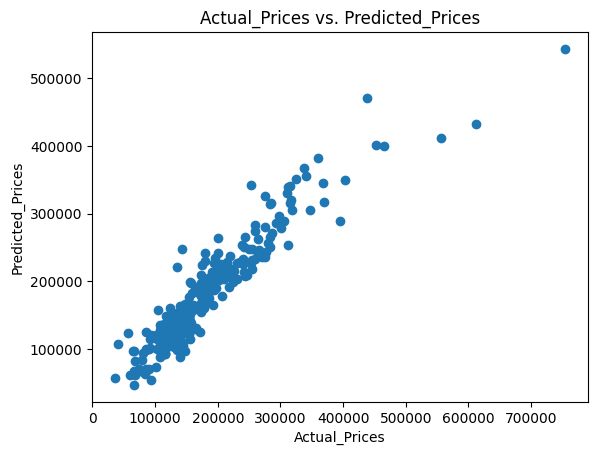

In [15]:
# Write your code here

#importing the necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import io

#read the test and train data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Select features (explanatory variables) and target variable (house prices)
x = train_data.drop('SalePrice', axis=1)  # Features
y = train_data['SalePrice']  # Target variable

# Identify categorical columns
categorical_col = [cname for cname in x.columns if x[cname].dtype == "object"]

# Separate numerical and categorical columns
numerical_col = [cname for cname in x.columns if x[cname].dtype in ['int64', 'float64']]
X_numerical = x[numerical_col]
X_categorical = x[categorical_col]

# Use ColumnTransformer to apply one-hot encoding to categorical columns and impute missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_col),  # Impute missing values for numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_col)  # Handle unknown categories
    ])

# Create a linear regression model with one-hot encoding and imputation
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions on the testing set
y_prediction = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_prediction)
r_squared = r2_score(y_test, y_prediction)

print("Mean Squared Error: ", mse)
print("R-squared: " ,r_squared )

pd1 = ((y_prediction - y_test) / y_test) * 100

# Create DataFrame for actual prices, predicted prices, and percentage difference
results_df = pd.DataFrame({
    'Actual_Prices': y_test,
    'Predicted_Prices': y_prediction,
    'Percentage_Difference': pd1
})

# Display the DataFrame
print(results_df)

# Visualize the predicted vs. actual prices
plt.scatter(y_test, y_prediction)
plt.xlabel("Actual_Prices")
plt.ylabel("Predicted_Prices")
plt.title("Actual_Prices vs. Predicted_Prices")
plt.show()


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [58]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import pipeline

# Load the dataset
data = pd.read_csv('/content/annotated_reviews (3).csv')  # Replace with your actual file name if different
print(data.head(), "\n")

# Initialize the zero-shot classification pipeline with RoBERTa
zero_shot_classifier = pipeline("zero-shot-classification", model="roberta-base")

# Define sentiment classes
sentiment_classes = ['positive', 'negative', 'neutral']

# Perform zero-shot classification for each review
resulted_sentiments = data['clean_text'].apply(
    lambda x: zero_shot_classifier(x, candidate_labels=sentiment_classes, hypothesis_template="This text is {}.")
)

# Extract predicted sentiments and their confidence scores
data['predicted_sentiment'] = [result['labels'][0] for result in resulted_sentiments]
data['sentiment_score'] = [result['scores'][0] for result in resulted_sentiments]

# Evaluate the model's performance
y_true = data['sentiment']  # Ground truth labels
y_pred = data['predicted_sentiment']  # Predicted labels

# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Save the results to a new CSV
data.to_csv('sentiment_analysis_results.csv', index=False)


   document_id                                         clean_text sentiment
0            1  wow the penguin is just terrific everyone know...  positive
1            2  absolutely nailed the tone and atmosphere grit...  negative
2            3  the first episode is a direct continuation of ...  positive
3            4  the batman for my taste had simply the greates...  negative
4            5  ive been waiting for the penguin ever since it...  positive 



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


Accuracy: 0.26
Precision: 0.28444444444444444
Recall: 0.26
F1 Score: 0.23213759213759214


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
# resulted dataframe
data.head()

,document_id,clean_text,sentiment,predicted_sentiment,sentiment_score
0,1,wow the penguin is just terrific everyone know...,positive,neutral,0.333428
1,2,absolutely nailed the tone and atmosphere grit...,negative,neutral,0.333336
2,3,the first episode is a direct continuation of ...,positive,neutral,0.333392
3,4,the batman for my taste had simply the greates...,negative,neutral,0.333419
4,5,ive been waiting for the penguin ever since it...,positive,neutral,0.333418


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculatting metrics using 'weighted' average to account for label imbalance
accuracy = accuracy_score(data['sentiment'], data['predicted_sentiment'])
precision = precision_score(data['sentiment'], data['predicted_sentiment'], average='weighted')
recall = recall_score(data['sentiment'], data['predicted_sentiment'], average='weighted')
f1 = f1_score(data['sentiment'], data['predicted_sentiment'], average='weighted')

print(f"Accuracy: {accuracy}\nWeighted Precision: {precision}\nWeighted Recall: {recall}\nWeighted F1 Score: {f1}")

Accuracy: 0.26
Weighted Precision: 0.28444444444444444
Weighted Recall: 0.26
Weighted F1 Score: 0.23213759213759214


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


*** Question 3: (5 factors) Discuss the advantages and downsides of the selected PLM, and any demanding situations encountered at some stage inside the implementation. This will allow a comprehensive expertise of the selected LLM's applicability and effectiveness for the given task.***

Advantages:

RoBERTa offers several blessings, which includes better performance, because it outperforms BERT on severa NLP responsibilities because of longer training, more information, and huge batch sizes, allowing it to examine extra correctly. It also presents mission flexibility, as RoBERTa can classify textual content into predefined lessons with no want project-unique outstanding-tuning, making it adaptable for different NLP responsibilities. Additionally, RoBERTa has strong generalization, being pretrained on diverse textual content resources, which lets in it generalize nicely at some point of domains and carry out properly on unseen tasks.

Disadvantages:

RoBERTa has immoderate computational demands because of its massive version period, requiring sizeable resources for both training and inference, which may be beneficial resource-intensive. Moreover, overall performance with out great-tuning for precise responsibilities won't reach the best accuracy. Finally, RoBERTa's inefficiency for deployment is some different difficulty, because the huge style of parameters makes it slow and much less green in useful useful resource-constrained environments.

Challenges Encountered

Handling Neutral Sentiments: One of the key worrying conditions became the problem in appropriately classifying independent sentiments. Neutral sentiments frequently present subtle cues that lead them to extra difficult to differentiate from both brilliant or terrible sentiments. Additionally, the ones neutral sentiments are a good deal much less regularly represented
